In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [2]:
# Distance measurement from the outside edge [cm]. 50cm = center of mesh. 
distance = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


# Array of File Names
files = [] 

# Loaded in Deflection Data
data  = []

# Load in the data
for i, dist in enumerate(distance):
    
    files.append("data/deflection_p" + str(dist) + "cm.csv")
    data.append(pd.read_csv(files[i], delimiter="\t", names=['Voltage', 'Deflection']))
    print(files[i], "loaded!")
    
    # Subtract the CV from the values and convert units to micro meters
    data[i]["Deflection"] = (data[i]["Deflection"] - data[i]["Deflection"][0])*1000

    #display(data[i])

data/deflection_p0cm.csv loaded!
data/deflection_p5cm.csv loaded!
data/deflection_p10cm.csv loaded!
data/deflection_p15cm.csv loaded!
data/deflection_p20cm.csv loaded!
data/deflection_p25cm.csv loaded!
data/deflection_p30cm.csv loaded!
data/deflection_p35cm.csv loaded!
data/deflection_p40cm.csv loaded!
data/deflection_p45cm.csv loaded!


In [19]:
def exp_model(x,k):
        return k*x*x

expmodel = Model(exp_model)

def expmodel_test(k,x):
    return k*x*x

Loop to determine beta that minimizes sum

In [21]:
arr_y = []
for b in np.arange(1,13,0.1):
    sum = 0
    for d, p in enumerate(distance):
        k = b*(0.4975**2-(p*10**-2)**2)
        #sum = 0
        for i in range(len(data[d])):
            sum += 0.01*(expmodel_test(k,data[d]["Voltage"][i])-(data[d]["Deflection"][i]))**2
    arr_y.append(sum)

Plot of sum vs beta 

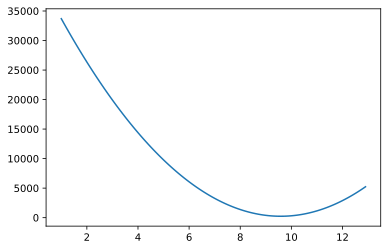

In [22]:
fig = plt.figure()
arr_x = np.arange(1,13,0.1)
plt.plot(arr_x,arr_y)

In [23]:
#The index of the minumum sum corresponds to a beta value of 9.6
#(86*0.1)+1 = 9.6
arr_y.index(min(arr_y))

86

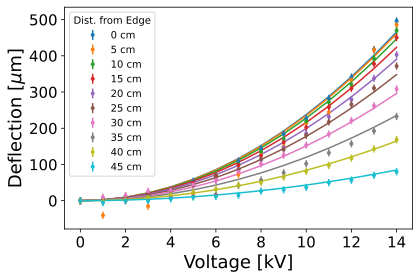

In [24]:
prediction=np.arange(0,28)
beta = (arr_y.index(min(arr_y))*0.1)+1
fig = plt.figure()
for p, rho in enumerate(distance):
    k = 9.6*(0.4975**2-(rho*10**-2)**2)
    plt.plot(data[p]["Voltage"],expmodel_test(k,data[p]["Voltage"]))
    

for i, val in enumerate(data):
    result = expmodel.fit(data[i]["Deflection"], x = data[i]["Voltage"], k=2)
    plt.errorbar(data[i]["Voltage"], data[i]["Deflection"], yerr=10, label=str(distance[i])+" cm", fmt='o', markersize = 3 )
    #plt.plot(data[i]["Voltage"], result.best_fit, '-', markersize = 3)
    #plt.plot(prediction, result.eval(x=prediction),'o', markersize = 3)
    plt.xlabel("Voltage [kV]", fontsize=18)
    plt.xticks(fontsize=15)
    plt.ylabel("Deflection [$\mu$m]",fontsize=18)
    plt.yticks(fontsize=15)
    plt.legend(title="Dist. from Edge")
    plt.tight_layout()
    plt.savefig("Deflection.pdf")
    #print(result.fit_report())